In [1]:
#Inspired by https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/3%20-%20Neural%20Networks/recurrent_network.py
# https://github.com/nlintz/TensorFlow-Tutorials/blob/master/07_lstm.ipynb
import tensorflow as tf
import numpy as np
from tensorflow.contrib import rnn
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
# configuration
#                        O * W + b -> 10 labels for each image, O[? 28], W[28 10], B[10]
#                       ^ (O: output 28 vec from 28 vec input)
#                       |
#      +-+  +-+       +--+
#      |1|->|2|-> ... |28| time_step_size = 28
#      +-+  +-+       +--+
#       ^    ^    ...  ^
#       |    |         |
# img1:[28] [28]  ... [28]
# img2:[28] [28]  ... [28]
# img3:[28] [28]  ... [28]
# ...
# img128 or img256 (batch_size or test_size 256)
#      each input size = input_vec_size=lstm_size=28

# configuration variables
input_vec_size = lstm_size = 28
time_step_size = 28

batch_size = 128
test_size = 256

def init_weights(shape, name):
    return tf.Variable(tf.random_normal(shape, stddev=0.01), name=name)

def model(X, W, B, lstm_size):
    with tf.name_scope('Model'):
        # X, input shape: (batch_size, time_step_size, input_vec_size)
        XT = tf.transpose(X, [1, 0, 2])  # permute time_step_size and batch_size
        # XT shape: (time_step_size, batch_size, input_vec_size)

        XR = tf.reshape(XT, [-1, lstm_size]) # each row has input for each lstm cell (lstm_size=input_vec_size)
        # XR shape: (time_step_size * batch_size, input_vec_size)
        """
        X_split will contain 28 tensors of shape 'batch_size' x 28
        So that, 1st tensor will contain 1st row (28 pixels) of 'batch_size' images
        2nd tensor will contain 2nd row (28 pixels) of 'batch_size' images
        ...
        """
        X_split = tf.split(XR, time_step_size, 0) # split them to time_step_size (28 arrays)
        # Each array shape: (batch_size, input_vec_size)

        # Make lstm with lstm_size (each input vector size)
        """
        https://www.tensorflow.org/api_docs/python/tf/contrib/rnn/BasicLSTMCell
        BasicLSTMCell(num_units, forget_bias=1.0, state_is_tuple=True, activation=None, reuse=None)
        The value of "num_units" is it up to you, too high a value may lead to overfitting
        or a very low value may yield extremely poor results.
        But, the shape of "outputs" depends on "num_units"
        So, define the shape of "weights" accourdingly because "outputs[-1]" and "weights" will be multiplied
        """
        lstm = rnn.BasicLSTMCell(lstm_size, forget_bias=1.0, state_is_tuple=True)

        # Get lstm cell output, time_step_size (28) arrays with lstm_size output: (batch_size, lstm_size)
        outputs, _states = rnn.static_rnn(lstm, X_split, dtype=tf.float32)

        # Linear activation
        # Get the last output
#         print("X_split: ", X_split)
#         print("outputs: ", outputs)
        logits1 = tf.matmul(outputs[0], W) + B
        logits2 = tf.matmul(outputs[6], W) + B
        logits3 = tf.matmul(outputs[13], W) + B
        logits4 = tf.matmul(outputs[20], W) + B
        logits5 = tf.matmul(outputs[27], W) + B
    return logits1, logits2, logits3, logits4, logits5

mnist = input_data.read_data_sets("../../../Datasets/MNIST_data/", one_hot=True)
trX, trY, teX, teY = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels
# print(len(trX))
# print(len(trX[0]))
trX = trX.reshape(-1, 28, 28) # (55000, 28, 28)
# print(len(trX))
# print(len(trX[0]))
# print(len(trX[0][0]))
teX = teX.reshape(-1, 28, 28)

Extracting ../../../Datasets/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../../../Datasets/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../../../Datasets/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../../../Datasets/MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
"""
Prints the image
Input: image pixels in list
"""
from matplotlib import pyplot as plt

def print_image(image, title):
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title(title)
    #plt.colorbar()
    plt.show()

print_image(trX[5700], "Original Image")

In [4]:
X = tf.placeholder("float", [None, 28, 28], name='InputData')
Y = tf.placeholder("float", [None, 10], name='LabelData')

# get lstm_size and output 10 labels
W = init_weights([lstm_size, 10], "Weights")
B = init_weights([10], "Bias")
print("W: ", W)
print("B: ", B)

tf.summary.histogram("weights", W)
tf.summary.histogram("biases", B)

#py_x, state_size = model(X, W, B, lstm_size)
logits1, logits2, logits3, logits4, logits5 = model(X, W, B, lstm_size)

print("logits1: ", logits1)

with tf.name_scope('Loss_logits1'):
    cost1 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits1, labels=Y))
tf.summary.scalar("loss_logits1", cost1) # Create a summary to monitor loss_op tensor
with tf.name_scope('Loss_logits2'):
    cost2 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits2, labels=Y))
tf.summary.scalar("loss_logits2", cost2) # Create a summary to monitor loss_op tensor
with tf.name_scope('Loss_logits3'):
    cost3 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits3, labels=Y))
tf.summary.scalar("loss_logits3", cost3) # Create a summary to monitor loss_op tensor
with tf.name_scope('Loss_logits4'):
    cost4 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits4, labels=Y))
tf.summary.scalar("loss_logits4", cost4) # Create a summary to monitor loss_op tensor
with tf.name_scope('Loss_logits5'):
    cost5 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits5, labels=Y))
tf.summary.scalar("loss_logits5", cost1) # Create a summary to monitor loss_op tensor

train_op1 = tf.train.RMSPropOptimizer(0.001, 0.9).minimize(cost1)
train_op2 = tf.train.RMSPropOptimizer(0.001, 0.9).minimize(cost2)
train_op3 = tf.train.RMSPropOptimizer(0.001, 0.9).minimize(cost3)
train_op4 = tf.train.RMSPropOptimizer(0.001, 0.9).minimize(cost4)
train_op5 = tf.train.RMSPropOptimizer(0.001, 0.9).minimize(cost5)

predict_op1 = tf.argmax(logits1, 1)
predict_op2 = tf.argmax(logits2, 1)
predict_op3 = tf.argmax(logits3, 1)
predict_op4 = tf.argmax(logits4, 1)
predict_op5 = tf.argmax(logits5, 1)

prediction1 = tf.nn.softmax(logits1)
correct_pred1 = tf.equal(tf.argmax(prediction1, 1), tf.argmax(Y, 1))
with tf.name_scope('Accuracy1'):
    accuracy1 = tf.reduce_mean(tf.cast(correct_pred1, tf.float32))
tf.summary.scalar("accuracy1", accuracy1) # Create a summary to monitor accuracy tensor

prediction2 = tf.nn.softmax(logits2)
correct_pred2 = tf.equal(tf.argmax(prediction2, 1), tf.argmax(Y, 1))
with tf.name_scope('Accuracy2'):
    accuracy2 = tf.reduce_mean(tf.cast(correct_pred2, tf.float32))
tf.summary.scalar("accuracy2", accuracy2) # Create a summary to monitor accuracy tensor

prediction3 = tf.nn.softmax(logits3)
correct_pred3 = tf.equal(tf.argmax(prediction3, 1), tf.argmax(Y, 1))
with tf.name_scope('Accuracy3'):
    accuracy3 = tf.reduce_mean(tf.cast(correct_pred3, tf.float32))
tf.summary.scalar("accuracy3", accuracy3) # Create a summary to monitor accuracy tensor

prediction4 = tf.nn.softmax(logits4)
correct_pred4 = tf.equal(tf.argmax(prediction4, 1), tf.argmax(Y, 1))
with tf.name_scope('Accuracy4'):
    accuracy4 = tf.reduce_mean(tf.cast(correct_pred4, tf.float32))
tf.summary.scalar("accuracy4", accuracy4) # Create a summary to monitor accuracy tensor

prediction5 = tf.nn.softmax(logits5)
correct_pred5 = tf.equal(tf.argmax(prediction5, 1), tf.argmax(Y, 1))
with tf.name_scope('Accuracy5'):
    accuracy5 = tf.reduce_mean(tf.cast(correct_pred5, tf.float32))
tf.summary.scalar("accuracy5", accuracy5) # Create a summary to monitor accuracy tensor

W:  <tf.Variable 'Weights:0' shape=(28, 10) dtype=float32_ref>
B:  <tf.Variable 'Bias:0' shape=(10,) dtype=float32_ref>
logits1:  Tensor("Model/add:0", shape=(?, 10), dtype=float32)


<tf.Tensor 'accuracy5:0' shape=() dtype=string>

In [5]:
import shutil, os
if os.path.exists("rnn_mnist_logs_2_many2many_lstm/"):
    shutil.rmtree("rnn_mnist_logs_2_many2many_lstm/")

In [6]:
training_epochs = 10

# Launch the graph in a session
with tf.Session() as sess:
    # you need to initialize all variables
    tf.global_variables_initializer().run()
    
    summary_op = tf.summary.merge_all() # Merge all summaries into a single op
    summary_writer = tf.summary.FileWriter("rnn_mnist_logs_2_many2many_lstm/", graph=tf.get_default_graph())
    
    saver = tf.train.Saver(max_to_keep=2)

    for epoch in range(training_epochs):
        for start, end in zip(range(0, len(trX), batch_size), range(batch_size, len(trX)+1, batch_size)):
            sess.run([train_op1, train_op2, train_op3, train_op4, train_op5], feed_dict={X: trX[start:end], Y: trY[start:end]})
            # Write logs at every iteration
            summary_str = sess.run(summary_op, feed_dict={X: trX[start:end], Y: trY[start:end]})
            summary_writer.add_summary(summary_str, epoch)
            
        # Save checkpoint
        saver.save(sess, "rnn_mnist_logs_2_many2many_lstm/model-checkpoint", epoch)

        test_indices = np.arange(len(teX))  # Get A Test Batch
        np.random.shuffle(test_indices)
        test_indices = test_indices[0:test_size]

        print("epoch: ", epoch)
        print("predict_op1", np.mean(np.argmax(teY[test_indices], axis=1) == sess.run(predict_op1, feed_dict={X: teX[test_indices]})))
        print("predict_op2", np.mean(np.argmax(teY[test_indices], axis=1) == sess.run(predict_op2, feed_dict={X: teX[test_indices]})))
        print("predict_op3", np.mean(np.argmax(teY[test_indices], axis=1) == sess.run(predict_op3, feed_dict={X: teX[test_indices]})))
        print("predict_op4", np.mean(np.argmax(teY[test_indices], axis=1) == sess.run(predict_op4, feed_dict={X: teX[test_indices]})))
        print("predict_op5", np.mean(np.argmax(teY[test_indices], axis=1) == sess.run(predict_op5, feed_dict={X: teX[test_indices]})))
        print("")

epoch:  0
predict_op1 0.125
predict_op2 0.36328125
predict_op3 0.62109375
predict_op4 0.6171875
predict_op5 0.59375

epoch:  1
predict_op1 0.10546875
predict_op2 0.53515625
predict_op3 0.8046875
predict_op4 0.85546875
predict_op5 0.8203125

epoch:  2
predict_op1 0.11328125
predict_op2 0.53125
predict_op3 0.8515625
predict_op4 0.8984375
predict_op5 0.87109375

epoch:  3
predict_op1 0.10546875
predict_op2 0.5703125
predict_op3 0.84765625
predict_op4 0.921875
predict_op5 0.91796875

epoch:  4
predict_op1 0.09765625
predict_op2 0.58203125
predict_op3 0.875
predict_op4 0.9375
predict_op5 0.91796875

epoch:  5
predict_op1 0.109375
predict_op2 0.578125
predict_op3 0.8359375
predict_op4 0.91796875
predict_op5 0.9140625

epoch:  6
predict_op1 0.10546875
predict_op2 0.578125
predict_op3 0.8671875
predict_op4 0.93359375
predict_op5 0.90625

epoch:  7
predict_op1 0.11328125
predict_op2 0.55859375
predict_op3 0.890625
predict_op4 0.9296875
predict_op5 0.94921875

epoch:  8
predict_op1 0.1484375
pre

In [216]:
print(teX.shape)
test_indices = np.arange(len(teX))  # Get A Test Batch
print(test_indices)
print(test_indices.shape)
np.random.shuffle(test_indices)
print(test_indices)
print(test_indices.shape)
test_indices = test_indices[0:test_size]
print(test_indices[0])
print(test_indices.shape)

(10000, 28, 28)
[   0    1    2 ... 9997 9998 9999]
(10000,)
[5505 9842 9402 ... 3068 8257 3582]
(10000,)
5505
(256,)


(1, 28, 28)


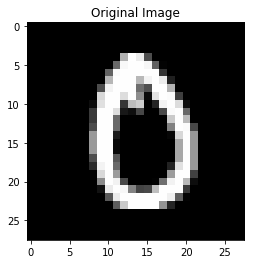

0


In [217]:
uncorrupted = []
#uncorrupted.append(teX[test_indices[0]])

teX_index = test_indices[0]

# use any index less than 10,000: 5505(0), 7183(1), 1984(2), 200(3), 7494(4), 2515(5), 2721(6), *2808(7), 4218(8), 104(9)
# teX_index = 1984

uncorrupted.append(teX[teX_index])
uncorrupted = np.array(uncorrupted)
print(uncorrupted.shape)

print_image(uncorrupted[0], "Original Image")
print(np.argmax(teY[teX_index]))

(1, 28, 28)


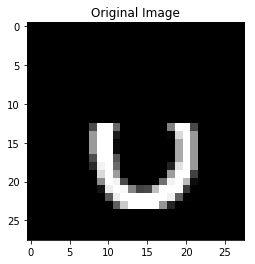

In [218]:
import copy

test_image_top0 = copy.deepcopy(teX[teX_index])

test_image_top0[0:13] = 0

a = []
a.append(test_image_top0)
a = np.array(a)
print(a.shape)

print_image(a[0], "Original Image")

(1, 28, 28)


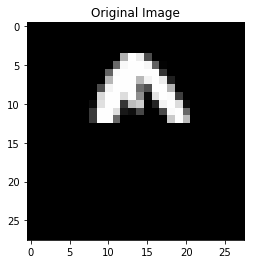

In [219]:
test_image_bottom0 = copy.deepcopy(teX[teX_index])

test_image_bottom0[13:28] = 0

b = []
b.append(test_image_bottom0)
b = np.array(b)
print(b.shape)

print_image(b[0], "Original Image")

In [220]:
# graph = tf.Graph()

# with graph.as_default():
#     saver = tf.train.Saver()
    
with tf.Session() as sess:
    # Restore
    saver.restore(sess, tf.train.latest_checkpoint("rnn_mnist_logs_2_many2many_lstm"))
    
    print("predict_op1", np.mean(np.argmax(teY[test_indices[0]], axis=0) == sess.run(predict_op1, feed_dict={X: uncorrupted})))
    print("predict_op2", np.mean(np.argmax(teY[test_indices[0]], axis=0) == sess.run(predict_op2, feed_dict={X: uncorrupted})))
    print("predict_op3", np.mean(np.argmax(teY[test_indices[0]], axis=0) == sess.run(predict_op3, feed_dict={X: uncorrupted})))
    print("predict_op4", np.mean(np.argmax(teY[test_indices[0]], axis=0) == sess.run(predict_op4, feed_dict={X: uncorrupted})))
    print("predict_op5", np.mean(np.argmax(teY[test_indices[0]], axis=0) == sess.run(predict_op5, feed_dict={X: uncorrupted})))
    print("")
    print("Top blank")
    print("predict_op1", np.mean(np.argmax(teY[test_indices[0]], axis=0) == sess.run(predict_op1, feed_dict={X: a})))
    print("predict_op2", np.mean(np.argmax(teY[test_indices[0]], axis=0) == sess.run(predict_op2, feed_dict={X: a})))
    print("predict_op3", np.mean(np.argmax(teY[test_indices[0]], axis=0) == sess.run(predict_op3, feed_dict={X: a})))
    print("predict_op4", np.mean(np.argmax(teY[test_indices[0]], axis=0) == sess.run(predict_op4, feed_dict={X: a})))
    print("predict_op5", np.mean(np.argmax(teY[test_indices[0]], axis=0) == sess.run(predict_op5, feed_dict={X: a})))
    print()
    print("Bottom blank")
    print("predict_op1", np.mean(np.argmax(teY[test_indices[0]], axis=0) == sess.run(predict_op1, feed_dict={X: b})))
    print("predict_op2", np.mean(np.argmax(teY[test_indices[0]], axis=0) == sess.run(predict_op2, feed_dict={X: b})))
    print("predict_op3", np.mean(np.argmax(teY[test_indices[0]], axis=0) == sess.run(predict_op3, feed_dict={X: b})))
    print("predict_op4", np.mean(np.argmax(teY[test_indices[0]], axis=0) == sess.run(predict_op4, feed_dict={X: b})))
    print("predict_op5", np.mean(np.argmax(teY[test_indices[0]], axis=0) == sess.run(predict_op5, feed_dict={X: b})))

INFO:tensorflow:Restoring parameters from rnn_mnist_logs_2_many2many_lstm\model-checkpoint-9
predict_op1 0.0
predict_op2 1.0
predict_op3 1.0
predict_op4 1.0
predict_op5 1.0

Top blank
predict_op1 0.0
predict_op2 0.0
predict_op3 0.0
predict_op4 0.0
predict_op5 0.0

Bottom blank
predict_op1 0.0
predict_op2 1.0
predict_op3 1.0
predict_op4 1.0
predict_op5 0.0
